In [156]:
import pandas as pd

#Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/cell_phones_total.csv')

# Convert the '1960' column to numeric before filling NaN values.
df['1960'] = pd.to_numeric(df['1960'], errors='coerce').fillna(0.0)

# Fill missing values horizontally (from left to right for each row).
df = df.ffill(axis=1)

# Replace 'k', 'M', and 'B' with numeric values and convert directly to float.
df.iloc[:, 1:] = df.iloc[:, 1:].replace({'k': 'e3', 'M': 'e6', 'B': 'e9'}, regex=True)

# Convert all relevant columns to numeric explicitly after replacement.
df.iloc[:, 1:] = df.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')

# Show the 5 first rows of the most recent years (sorted by 2015).
df[['iso-3', '2015', '2016', '2017', '2018', '2019']].sort_values('2015', ascending=False).head()



/var/folders/79/2syrkwss6491_3tvxmjdqrpr0000gn/T/ipykernel_73999/1970075411.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.iloc[:, 1:] = df.iloc[:, 1:].replace({'k': 'e3', 'M': 'e6', 'B': 'e9'}, regex=True)


,iso-3,2015,2016,2017,2018,2019
35,CHN,1290000000.0,1360000000.0,1470000000.0,1650000000.0,1730000000.0
87,IND,1000000000.0,1130000000.0,1170000000.0,1180000000.0,1150000000.0
200,USA,382000000.0,396000000.0,400000000.0,422000000.0,422000000.0
86,IDN,339000000.0,386000000.0,435000000.0,319000000.0,345000000.0
26,BRA,258000000.0,244000000.0,218000000.0,207000000.0,207000000.0


In [155]:
data = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/pop_data.csv')

# Fill missing values horizontally (from left to right for each row).
data = data.ffill(axis=1)

#show the dataset without missing values
data.head()


,Unnamed: 0,iso-3,1960,1961,1962,1963,1964,1965,1966,1967,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0,ABW,54608.0,55811.0,56682.0,57475.0,58178.0,58782.0,59291.0,59522.0,...,101288.0,102112.0,102880.0,103594.0,104257.0,104874.0,105439.0,105962.0,106442.0,106585.0
1,1,AFE,130692579.0,134169237.0,137835590.0,141630546.0,145605995.0,149742351.0,153955516.0,158313235.0,...,537792950.0,552530654.0,567892149.0,583651101.0,600008424.0,616377605.0,632746570.0,649757148.0,667242986.0,685112979.0
2,2,AFG,8622466.0,8790140.0,8969047.0,9157465.0,9355514.0,9565147.0,9783147.0,10010030.0,...,29249157.0,30466479.0,31541209.0,32716210.0,33753499.0,34636207.0,35643418.0,36686784.0,37769499.0,38972230.0
3,3,AFW,97256290.0,99314028.0,101445032.0,103667517.0,105959979.0,108336203.0,110798486.0,113319950.0,...,366489204.0,376797999.0,387204553.0,397855507.0,408690375.0,419778384.0,431138704.0,442646825.0,454306063.0,466189102.0
4,4,AGO,5357195.0,5441333.0,5521400.0,5599827.0,5673199.0,5736582.0,5787044.0,5827503.0,...,24259111.0,25188292.0,26147002.0,27128337.0,28127721.0,29154746.0,30208628.0,31273533.0,32353588.0,33428486.0


In [163]:
# Reshape the cell phone data to a long format
df_cellphones = df.melt(id_vars=["iso-3"], var_name="year", value_name="n_cellphones")

# Convert 'year' to numeric and 'n_cellphones' to numeric (in case there are any non-numeric values)
df_cellphones['year'] = pd.to_numeric(df_cellphones['year'], errors='coerce')
df_cellphones['n_cellphones'] = pd.to_numeric(df_cellphones['n_cellphones'], errors='coerce')

# Reshape the population data to a long format
df_population = data.melt(id_vars=["iso-3"], var_name="year", value_name="population")

# Convert 'year' to numeric and 'population' to numeric
df_population['year'] = pd.to_numeric(df_population['year'], errors='coerce')
df_population['population'] = pd.to_numeric(df_population['population'], errors='coerce')

# Merge the reshaped cell phone and population data on 'iso-3' and 'year'
df_merged = pd.merge(df_cellphones, df_population, on=["iso-3", "year"], how="inner")

# Display the merged data
df_merged.head()


,iso-3,year,n_cellphones,population
0,ABW,1960,0.0,54608.0
1,AFG,1960,0.0,8622466.0
2,AGO,1960,0.0,5357195.0
3,ALB,1960,0.0,1608800.0
4,AND,1960,0.0,9443.0


In [172]:
# Load the country data CSV to get the country names
country_data = pd.read_csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/country_data.csv')

# Display the first few rows to understand its structure
country_data.head()


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [184]:

# Slå ihop med landdata för att få namn
df_full = pd.merge(df_merged, country_data[['alpha-3', 'name']], left_on='iso-3', right_on='alpha-3', how='left')

# Beräkna phones per capita
df_full['phones_per_capita'] = df_full['n_cellphones'] / df_full['population']

# Pivotera datan så att år är rader och länder är kolumner
df_pivoted = df_full.pivot_table(index='year', columns='name', values='phones_per_capita')

# Sortera länderna baserat på värdena för 2019
df_pivoted_sorted = df_pivoted.sort_values(by=2019, axis=1, ascending=False)

# Välj de 5 länder med högst phones per capita för 2019 och visa de senaste 5 åren
top_5_countries = df_pivoted_sorted.iloc[:, :5]
top_5_countries.tail()



name,Macao,Hong Kong,United Arab Emirates,Antigua and Barbuda,Seychelles
year,,,,,
2015,3.088231,2.290401,2.007424,1.956838,1.584260
2016,3.143510,2.398931,2.212521,1.987545,1.605459
2017,3.210102,2.488773,2.183431,2.019337,1.742433
2018,3.348741,2.670209,2.199084,2.008164,1.849900
2019,3.284849,2.863650,2.127739,1.997460,1.987196


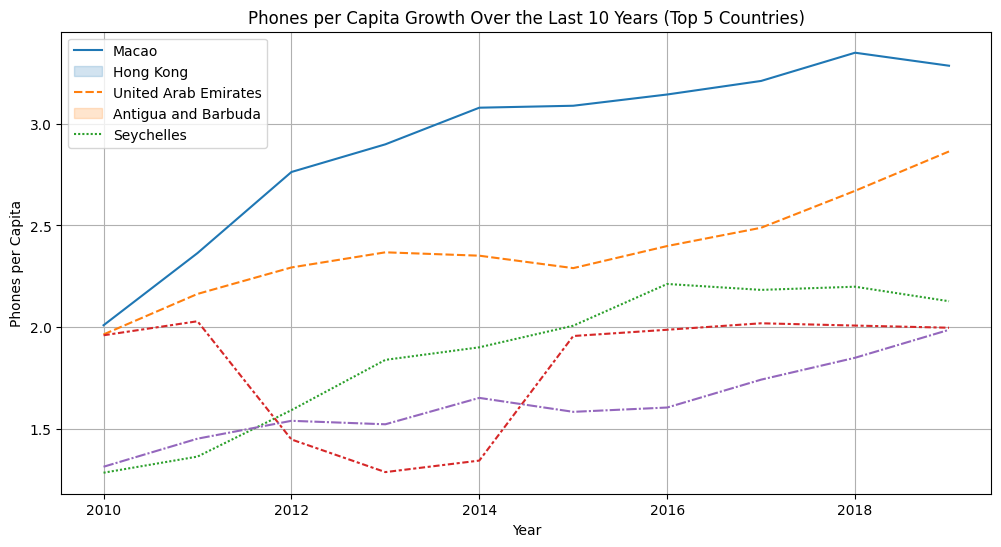

In [186]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtrera data för de senaste 10 åren och de 5 länderna med högst antal telefoner per capita
last10_years_top5 = top_5_countries.tail(10)  # De senaste 10 åren
last10_years_top5 = last10_years_top5.iloc[:, :5]  # De 5 bästa länderna

# Plotta tillväxten med Seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=last10_years_top5)

plt.title("Phones per Capita Growth Over the Last 10 Years (Top 5 Countries)")
plt.xlabel("Year")
plt.ylabel("Phones per Capita")
plt.legend(labels=last10_years_top5.columns, loc='upper left')
plt.grid(True)
plt.show()



In [203]:
import sqlite3
conn = sqlite3.connect('user_actions.db')
cursor = conn.cursor()

tables = list(cursor.execute("SELECT sql FROM sqlite_master WHERE type='table';"))
tables #finding tables and their attributes


[]